In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from eplusparser.eplusparser import parse

In [74]:
df = parse('../OpenStudio_Models/Office_Austin/run/eplusout.sql')
df.head()

KeyValue                                          \
VariableName Electricity:Facility   Gas:Facility   
TimeIndex                                          
1                    2.384846e+07  517799.092361   
2                    2.384846e+07  317400.518857   
3                    2.384846e+07       0.000000   
4                    2.384846e+07       0.000000   
5                    2.384846e+07       0.000000   

KeyValue     ADU AIR TERMINAL SINGLE DUCT UNCONTROLLED 1  \
VariableName   Zone Air Terminal Sensible Cooling Energy   
TimeIndex                                                  
1                                                    0.0   
2                                                    0.0   
3                                                    0.0   
4                                                    0.0   
5                                                    0.0   

KeyValue                                              \
VariableName Zone Air Terminal Sensible Cooling Rate   
TimeIndex                                              
1                                                0.0   
2                                                0.0   
3                                                0.0   
4                                                0.0   
5                                                0.0   

KeyValue                                                \
VariableName Zone Air Terminal Sensible Heating Energy   
TimeIndex                                                
1                                         3.323133e+06   
2                                         3.100423e+06   
3                                         2.721131e+06   
4                                         2.464186e+06   
5                                         2.296233e+06   

KeyValue                                              \
VariableName Zone Air Terminal Sensible Heating Rate   
TimeIndex                                              
1                                        5538.555818   
2                                        5167.371432   
3                                        4535.218341   
4                                        4106.976216   
5                                        3827.054587   

KeyValue                         AIR LOOP HVAC 1  \
VariableName Air System Mixed Air Mass Flow Rate   
TimeIndex                                          
1                                       1.993383   
2                                       1.993383   
3                                       1.993383   
4                                       1.993383   
5                                       1.993383   

KeyValue                                               \
VariableName Air System Outdoor Air Economizer Status   
TimeIndex                                               
1                                                 0.0   
2                                                 0.0   
3                                                 0.0   
4                                                 0.0   
5                                                 0.0   

KeyValue                                           \
VariableName Air System Outdoor Air Flow Fraction   
TimeIndex                                           
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   
5                                             0.0   

KeyValue                                                                               \
VariableName Air System Outdoor Air Heat Recovery Bypass Heating Coil Activity Status   
TimeIndex                                                                               
1                                                           0.0                         
2                                                           0.0                     

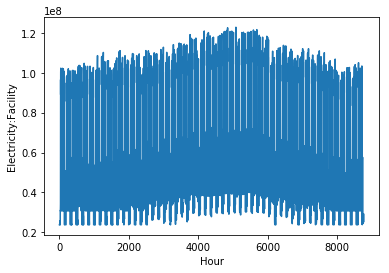

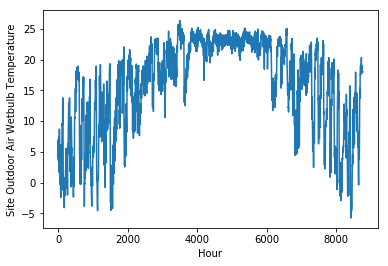

In [75]:
def plot_variable(keyValue, varName):
    ax = plt.subplot(1,1,1)
    p1, = ax.plot(df.index.values, df[keyValue][varName])
    ax.set_xlabel("Hour")
    ax.set_ylabel(varName)
    plt.show()

plot_variable("", "Electricity:Facility")
plot_variable("Environment", "Site Outdoor Air Wetbulb Temperature")

In [78]:
# Let's normalize the entire dataframe
# Doing this over the entire data frame may not be the best but it's my first pass
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
normalized_df = normalized_df.dropna(axis='columns')

normalized_df = normalized_df.loc[:, (normalized_df != 0).any(axis=0)]
display(normalized_df.head())
# df =((df-df.min())/(df.max()-df.min()))*20

KeyValue                                        \
VariableName Electricity:Facility Gas:Facility   
0                        0.001205     0.046361   
1                        0.001205     0.028419   
2                        0.001205     0.000000   
3                        0.001205     0.000000   
4                        0.001205     0.000000   

KeyValue     ADU AIR TERMINAL SINGLE DUCT UNCONTROLLED 1  \
VariableName   Zone Air Terminal Sensible Cooling Energy   
0                                                    0.0   
1                                                    0.0   
2                                                    0.0   
3                                                    0.0   
4                                                    0.0   

KeyValue                                              \
VariableName Zone Air Terminal Sensible Cooling Rate   
0                                                0.0   
1                                                0.0   
2                                                0.0   
3                                                0.0   
4                                                0.0   

KeyValue                                                \
VariableName Zone Air Terminal Sensible Heating Energy   
0                                             0.312472   
1                                             0.291531   
2                                             0.255866   
3                                             0.231706   
4                                             0.215913   

KeyValue                                              \
VariableName Zone Air Terminal Sensible Heating Rate   
0                                           0.186057   
1                                           0.173588   
2                                           0.152352   
3                                           0.137966   
4                                           0.128563   

KeyValue                         AIR LOOP HVAC 1  \
VariableName Air System Mixed Air Mass Flow Rate   
0                                            1.0   
1                                            1.0   
2                                            1.0   
3                                            1.0   
4                                            1.0   

KeyValue                                                                                            \
VariableName Air System Outdoor Air Heat Recovery Bypass Minimum Outdoor Air Mixed Air Temperature   
0                                                      0.652683                                      
1                                                      0.582644                                      
2                                                      0.519548                                      
3                                                      0.474811                                      
4                                                      0.454952                                      

KeyValue                                                \
VariableName Air System Simulation Cycle On Off Status   
0                                                  1.0   
1                                                  1.0   
2                                                  1.0   
3                                                  1.0   
4                                                  1.0   

KeyValue       AIR TERMINAL SINGLE DUCT UNCONTROLLED 1  ...  \
VariableName Zone Air Terminal Sensible Cooling Energy  ...   
0                                                  0.0  ...   
1                                                  0.0  ...   
2                                                  0.0  ...   
3                                                  0.0  ...   
4                                                  0.0  ...   

KeyValue                              VENDING 6  \
VariableName Electric Equipment Electric Energy   
0   

In [79]:
from sklearn.linear_model import LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score, train_test_split

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

input_df = normalized_df.drop([("", "Electricity:Facility"), ("", "Gas:Facility")], axis=1)
y = normalized_df["", "Electricity:Facility"]
# TODO: Add Gas:Facility to output



In [80]:
# Split data according to 80-20 and train simple Lasso Model

X_train, X_test, y_train, y_test = train_test_split(input_df, y, test_size=0.3, shuffle=False)
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005], cv=5).fit(X_train, y_train)

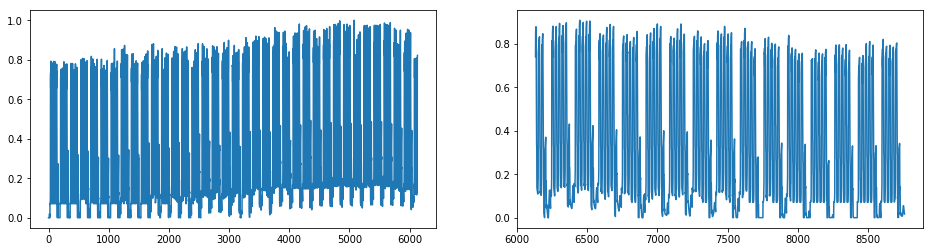

In [81]:
_, (ax1, ax2) = plt.subplots(1,2,figsize=(16, 4))

# Testing Data Subset
ax1.plot(X_train.index.values, y_train)

# Training Data Subset
ax2.plot(X_test.index.values, y_test)

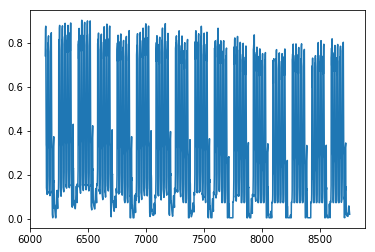

In [82]:
# Predictions on test dataset
# print("RMSE Error: {0}".format(rmse_cv(model_lasso).mean()))
plt.plot(X_test.index.values, model_lasso.predict(X_test))

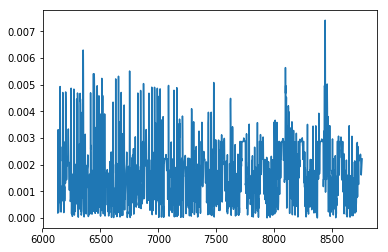

In [83]:
# Error in testing data
plt.plot(X_test.index.values, abs(y_test - model_lasso.predict(X_test)))

Lasso picked 22 variables and eliminated the other 541 variables


Text(0.5, 1.0, 'Coefficients in the Lasso Model')

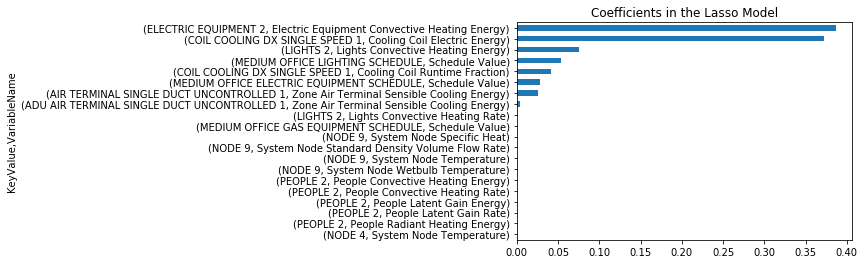

In [84]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

In [28]:
df_mich = parse('../OpenStudio_Models/Office_Michigan/run/eplusout.sql')

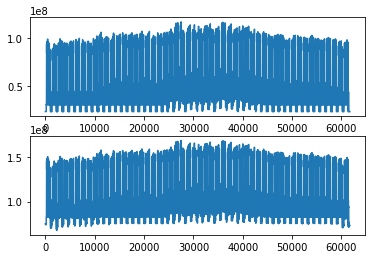

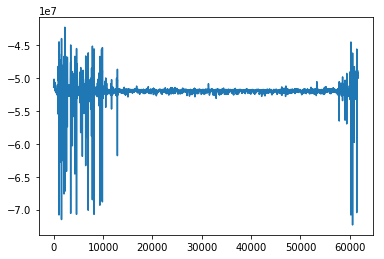

In [11]:
X_test = df_mich.drop(("", "Electricity:Facility"), axis=1)

y_true = df_mich["", "Electricity:Facility"]
y_pred = model_lasso.predict(X_test)

_, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(df_mich.index.values, y_true)
ax2.plot(df_mich.index.values, y_pred)

plt.figure()
plt.plot(df_mich.index.values, y_true - y_pred)